In [1]:
#Import The Libraries
import pandas as pd

In [2]:
dataset=pd.read_csv("mr_datasheet2014.csv")

In [3]:
dataset

,District_Name,Crop_Year,Season,Crop,Area,Production
0,AURANGABAD,2014,Kharif,Arhar/Tur,32900,8700.0
1,AURANGABAD,2014,Kharif,Bajra,45300,24200.0
2,AURANGABAD,2014,Kharif,Cotton(lint),422600,244300.0
3,AURANGABAD,2014,Kharif,Groundnut,4100,900.0
4,AURANGABAD,2014,Kharif,Jowar,3700,1700.0
...,...,...,...,...,...,...
146,OSMANABAD,2014,Rabi,Wheat,24100,7100.0
147,OSMANABAD,2014,Summer,Groundnut,1900,800.0
148,OSMANABAD,2014,Summer,Maize,1300,NaN
149,OSMANABAD,2014,Summer,Sunflower,500,200.0


In [4]:
dataset.isnull().sum()

District_Name     0
Crop_Year         0
Season            0
Crop              0
Area              0
Production       16
dtype: int64

In [5]:
dir(dataset)

['Area',
 'Crop',
 'Crop_Year',
 'District_Name',
 'Production',
 'Season',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__

In [6]:
dataset.columns

Index(['District_Name', 'Crop_Year', 'Season', 'Crop', 'Area', 'Production'], dtype='object')

In [7]:
dataset.cov(numeric_only=True)

,Crop_Year,Area,Production
Crop_Year,0.0,0.000000e+00,0.000000e+00
Area,0.0,5.521939e+09,2.726695e+09
Production,0.0,2.726695e+09,9.455144e+10


In [8]:
dataset.corr(numeric_only=True)

,Crop_Year,Area,Production
Crop_Year,NaN,NaN,NaN
Area,NaN,1.000000,0.114598
Production,NaN,0.114598,1.000000


In [10]:
dataset.drop('Production',inplace=True,axis=1)

In [11]:
dataset

,District_Name,Crop_Year,Season,Crop,Area
0,AURANGABAD,2014,Kharif,Arhar/Tur,32900
1,AURANGABAD,2014,Kharif,Bajra,45300
2,AURANGABAD,2014,Kharif,Cotton(lint),422600
3,AURANGABAD,2014,Kharif,Groundnut,4100
4,AURANGABAD,2014,Kharif,Jowar,3700
...,...,...,...,...,...
146,OSMANABAD,2014,Rabi,Wheat,24100
147,OSMANABAD,2014,Summer,Groundnut,1900
148,OSMANABAD,2014,Summer,Maize,1300
149,OSMANABAD,2014,Summer,Sunflower,500


In [12]:
import seaborn as sns

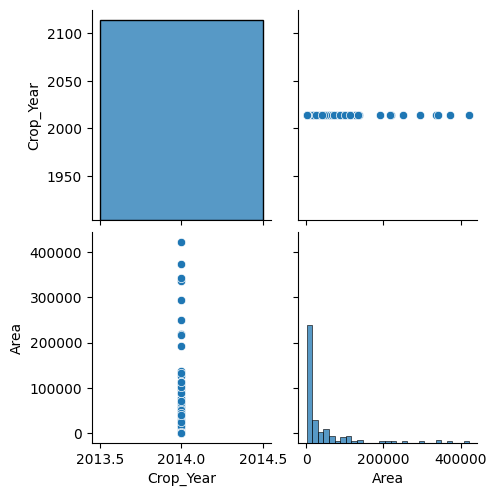

In [13]:
sns.pairplot(dataset)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [15]:
corrected_columns = [col.strip() for col in dataset.columns]
dataset.columns = corrected_columns

In [16]:
def quanqual(dataset):   
        quan=[]
        qual=[]
        for columnName in dataset.columns:
               # print(columnName)
                if(dataset[columnName].dtype=='O'):
                    #print("qual")
                    qual.append(columnName)
                else:
                   # print("quan")
                    quan.append(columnName)
        return quan,qual

In [17]:
quan,qual=quanqual(dataset)

In [18]:
quan

['Crop_Year', 'Area']

In [19]:
qual

['District_Name', 'Season', 'Crop']

In [21]:
calc_vif(dataset[['Crop_Year', 'Area']])

,variables,VIF
0,Crop_Year,1.267631
1,Area,1.000000


In [22]:
dataset

,District_Name,Crop_Year,Season,Crop,Area
0,AURANGABAD,2014,Kharif,Arhar/Tur,32900
1,AURANGABAD,2014,Kharif,Bajra,45300
2,AURANGABAD,2014,Kharif,Cotton(lint),422600
3,AURANGABAD,2014,Kharif,Groundnut,4100
4,AURANGABAD,2014,Kharif,Jowar,3700
...,...,...,...,...,...
146,OSMANABAD,2014,Rabi,Wheat,24100
147,OSMANABAD,2014,Summer,Groundnut,1900
148,OSMANABAD,2014,Summer,Maize,1300
149,OSMANABAD,2014,Summer,Sunflower,500


In [23]:
dataset['District_Name'] = dataset['District_Name'].str.strip()

In [24]:
print(dataset['District_Name'].unique())

['AURANGABAD' 'BEED' 'HINGOLI' 'JALNA' 'LATUR' 'NANDED' 'OSMANABAD']


In [27]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
District_Name = dataset[dataset['District_Name']=='S']['Area']
District_Name1 = dataset[dataset['District_Name']=='S']['Area']
ttest_ind(District_Name,District_Name1)

TtestResult(statistic=nan, pvalue=nan, df=nan)

In [28]:
#One way Independent classification

In [30]:
import scipy.stats as stats

stats.f_oneway(dataset['Crop_Year'],dataset['Area'])

F_onewayResult(statistic=36.03530651617848, pvalue=5.585363124945651e-09)